# 6.4.2 Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Ensures that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
# 6.4.1 Import COVID dataframe for people aged 65+

In [17]:
covid = pd.read_csv(r'/Users/samantha/Documents/COVID Analysis/02 Data/Prepared Data/5-15_c19_totals_states_2020-2023_65+.csv', index_col = False) 

# 6.4.3 Clean your data so that it’s ready for analysis.

In [18]:
covid.columns

Index(['group', 'year', 'month', 'hhs_region', 'state', 'place_of_death',
       'age_group', 'deaths_c19', 'deaths_flu', 'deaths_pna',
       'deaths_c19_and_pna', 'deaths_c19_pna_or_flu', 'deaths_total'],
      dtype='object')

In [19]:
covid.head(20)

,group,year,month,hhs_region,state,place_of_death,age_group,deaths_c19,deaths_flu,deaths_pna,deaths_c19_and_pna,deaths_c19_pna_or_flu,deaths_total
0,By Month,2020,1,4,Alabama,Total - All Places of Death,65-74 years,0,11,64,0,75,1034
1,By Month,2020,1,4,Alabama,Total - All Places of Death,75-84 years,0,5,86,0,91,1178
2,By Month,2020,1,4,Alabama,Total - All Places of Death,85 years and over,0,5,64,0,65,1177
3,By Month,2020,2,4,Alabama,Total - All Places of Death,65-74 years,0,12,60,0,72,968
4,By Month,2020,2,4,Alabama,Total - All Places of Death,75-84 years,0,5,76,0,79,1159
5,By Month,2020,2,4,Alabama,Total - All Places of Death,85 years and over,5,5,61,0,63,1114
6,By Month,2020,3,4,Alabama,Total - All Places of Death,65-74 years,14,5,62,5,81,1051
7,By Month,2020,3,4,Alabama,Total - All Places of Death,75-84 years,5,5,87,5,98,1165
8,By Month,2020,3,4,Alabama,Total - All Places of Death,85 years and over,10,5,58,5,70,1151
9,By Month,2020,4,4,Alabama,Total - All Places of Death,65-74 years,87,5,81,29,144,1061


In [20]:
covid.shape

(6360, 13)

In [ ]:
# No need to rename columns

In [21]:
covid.isnull().sum()

group                    0
year                     0
month                    0
hhs_region               0
state                    0
place_of_death           0
age_group                0
deaths_c19               0
deaths_flu               0
deaths_pna               0
deaths_c19_and_pna       0
deaths_c19_pna_or_flu    0
deaths_total             0
dtype: int64

In [ ]:
# No missing values

In [22]:
dups = covid.duplicated()

In [23]:
dups.shape

(6360,)

In [ ]:
# No duplicates

In [ ]:
# Extreme Value Checks

/Users/samantha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deaths_c19', ylabel='Density'>

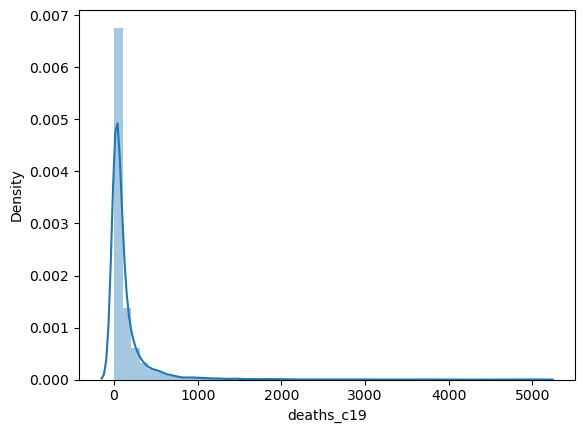

In [26]:
sns.distplot(covid['deaths_c19'], bins=50)
# Shows extreme values

In [25]:
covid['deaths_c19'].mean() # Check the mean

134.93333333333334

In [27]:
covid['deaths_c19'].median() # Check the median

49.0

In [28]:
covid['deaths_c19'].max() # Check the max

5094

# 6.4.5 State your hypothesis in a markdown cell within your Jupyter notebook.

### Hypothesis: For persons over the age of 65, deaths from COVID-19, pneumonia deaths will be increased. 

# 6.4.4 Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

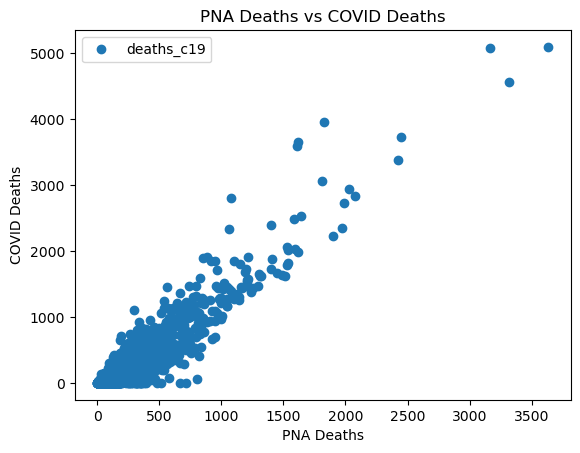

In [30]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

covid.plot(x = 'deaths_pna', y='deaths_c19',style='o') 
plt.title('PNA Deaths vs COVID Deaths')  
plt.xlabel('PNA Deaths')  
plt.ylabel('COVID Deaths')  
plt.show()

# 6.4.6 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = covid['deaths_pna'].values.reshape(-1,1)
y = covid['deaths_c19'].values.reshape(-1,1)

In [32]:
X

array([[ 64],
       [ 86],
       [ 64],
       ...,
       [ 44],
       [103],
       [ 96]])

In [33]:
y

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [ 5],
       [ 5],
       [13]])

# 6.4.7 Split the data into two sets: a training set and a test set.

In [34]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 6.4.8 Run a linear regression on the data.

In [35]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

### 6.4.8a First, fit the model you created to the training set.

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

### 6.4.8b Then, create a prediction for y on the test set.

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

# 6.4.9 Create a plot that shows the regression line on the test set.

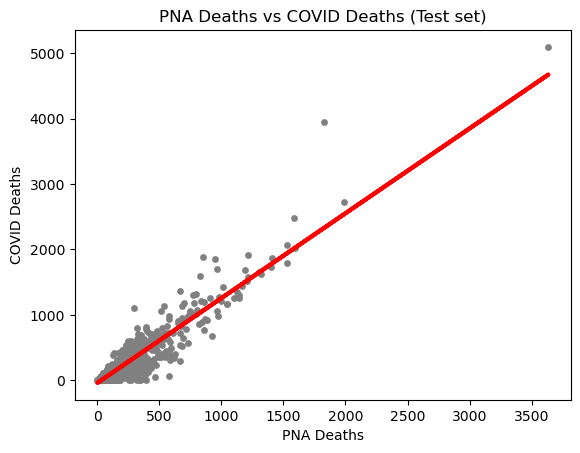

In [38]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('PNA Deaths vs COVID Deaths (Test set)')
plot_test.xlabel('PNA Deaths')
plot_test.ylabel('COVID Deaths')
plot_test.show()

# 6.4.10 Write your own interpretation of how well the line appears to fit the data in a markdown cell.
The regression line appeares to fit the data well. Most of the data points are very close to the regression line with the exception of 2 outliers. 

# 6.4.11 Check the model performance statistics—MSE and R2 score.

In [39]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [40]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.29572359]]
Mean squared error:  10892.419508351417
R2 score:  0.8796844669667697


# 6.4.12 Compare the predicted y values with the actual y values in a dataframe.

In [41]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,40,52.121416
1,141,203.721076
2,302,335.884882
3,141,201.129629
4,22,0.292472
5,5,-32.100617
6,81,54.712863
7,29,346.250671
8,2025,2026.804168
9,34,0.292472


In [ ]:
# Compare how the regression fits the training set

In [42]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.29572359]]
Mean squared error:  10841.512018657591
R2 score:  0.8573156295345908


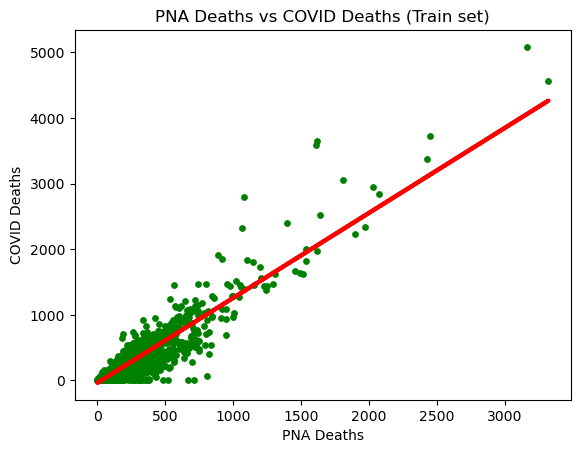

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('PNA Deaths vs COVID Deaths (Train set)')
plot_test.xlabel('PNA Deaths')
plot_test.ylabel('COVID Deaths')
plot_test.show()

# 6.4.13 Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.
I think the overall, the model's performance was mediocre. The slope indicates that there is a positive relationship. That is, as PNA deaths rise, COVID deaths also rise. However, the MSE appears to be quite high, which could mean there is some considerable distance from the regression line, which could mean it is not a good fit. The R2 of 0.8573 is fairly close to 1, which indicates that the regression line is a good fit. Since this data is regarding PNA Deaths vs COVID Deaths, might not accurately reflect deaths in marginalized communities, though socioeconomic status and race/ethnicity are not included in the data. 